In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

The dependencies provides for the initial analysis of limited data on the US movie industry over the last 20 years.
Further consideration is given to extending the analysis in the future, to cover the  broader  global movie industry using other data sources, doing regression analysis and making projections into the future of the industry.

In [8]:
# Read cleaned movie data into pandas dataframe
IMDB_movies_df=pd.read_csv("Resources/IMDB_movies_and_ratings.csv")

# Data clean: remove old index from csv file
del IMDB_movies_df["Unnamed: 0"]

# Print a sample view of the data
IMDB_movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,8.3,8707.0,8.3,3334.0,8.0,665.0,8.3,30678.0,8.2,66535.0
1,tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,...,8.5,7216.0,8.4,2995.0,8.1,648.0,8.5,26265.0,8.5,69116.0
2,tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,8.5,9280.0,8.4,3233.0,8.2,654.0,8.5,28002.0,8.5,92614.0
3,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,7.7,18021.0,8.0,3470.0,7.9,719.0,7.7,37903.0,7.6,70466.0
4,tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,8.5,34904.0,8.6,12294.0,8.0,739.0,8.2,63770.0,8.1,108032.0


A separate CSV file was created from the preliminary output of data from the merged files and inital cleaning process.
The duplicate index from the CSV file under the column, ""Unnamed: 0", needed to be removed. 

In [9]:
# Print a list of columns to view column names
print ("Column titles:  ")
print (" ")
for col in IMDB_movies_df.columns:
    print(col)
    
print (" ")
print ("-----------------------")    
print (" ")

# Print the records count to determine level of magnitude
print ("Number of movies in this dataset:  ")
len(IMDB_movies_df)    

Column titles:  
 
imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics
weighted_average_vote
total_votes
mean_vote
median_vote
votes_10
votes_9
votes_8
votes_7
votes_6
votes_5
votes_4
votes_3
votes_2
votes_1
allgenders_0age_avg_vote
allgenders_0age_votes
allgenders_18age_avg_vote
allgenders_18age_votes
allgenders_30age_avg_vote
allgenders_30age_votes
allgenders_45age_avg_vote
allgenders_45age_votes
males_allages_avg_vote
males_allages_votes
males_0age_avg_vote
males_0age_votes
males_18age_avg_vote
males_18age_votes
males_30age_avg_vote
males_30age_votes
males_45age_avg_vote
males_45age_votes
females_allages_avg_vote
females_allages_votes
females_0age_avg_vote
females_0age_votes
females_18age_avg_vote
females_18age_votes
females_30age_avg_vote
females_30age_votes
females_45age_avg_vote
fema

4181

In [10]:
# This step prints out the column-headings of the workfile to determine the scope and level of magnitude.

In [11]:
# Filter data for movieS made from 1997 to present
# movies_made_after_1997 = IMDB_movies_df.loc[IMDB_movies_df["year"] >= 1997].loc[IMDB_movies_df["year"] <= 2017]
movies_made_after_1997 = IMDB_movies_df.loc[IMDB_movies_df["year"] >= 1997]

# Remove incomplete data from year 2019
movies_made_before_2018 = movies_made_after_1997.loc[IMDB_movies_df["year"] <= 2017]

# Filter data for movies made from 1997 to present that were made in the USA
USA_movies = movies_made_before_2018.loc[movies_made_after_1997["country"] == "USA"]
USA_movies.reset_index()
USA_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
11,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,13963.0,6.7,3407.0,6.1,488.0,6.4,14442.0,6.3,37733.0
880,tt0118548,Absolute Power,Absolute Power,1997,1997-05-30,"Action, Crime, Drama",121,USA,"English, Spanish",Clint Eastwood,...,6.8,1387.0,7.1,1408.0,6.7,548.0,6.8,10520.0,6.7,22552.0
882,tt0118583,Alien Resurrection,Alien Resurrection,1997,1997-11-28,"Action, Horror, Sci-Fi",109,USA,English,Jean-Pierre Jeunet,...,6.6,9088.0,6.5,3140.0,6.4,753.0,6.0,35528.0,6.3,105860.0
883,tt0118607,Amistad,Amistad,1997,1998-02-27,"Drama, History",155,USA,"English, Mende, Spanish, Portuguese",Steven Spielberg,...,7.4,3837.0,7.7,1778.0,6.8,530.0,7.4,15413.0,7.2,31349.0
884,tt0118615,Anaconda,Anaconda,1997,1997-05-09,"Action, Adventure, Horror",89,USA,English,Luis Llosa,...,4.5,5727.0,4.8,1257.0,4.8,634.0,4.8,18113.0,4.7,43971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,tt6003368,Diary of a Wimpy Kid: The Long Haul,Diary of a Wimpy Kid: The Long Haul,2017,2017-05-26,"Comedy, Family",91,USA,"English, Spanish",David Bowers,...,5.1,250.0,4.8,102.0,4.0,111.0,4.4,1041.0,4.7,1739.0
4063,tt6113488,The Case for Christ,The Case for Christ,2017,2017-04-07,"Biography, Drama",112,USA,English,Jon Gunn,...,6.3,432.0,7.1,323.0,4.5,98.0,6.6,1808.0,5.4,1816.0
4071,tt6217804,Tyler Perry's Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,2017-10-20,"Comedy, Drama, Horror",101,USA,English,Tyler Perry,...,4.6,227.0,4.9,144.0,3.2,84.0,3.8,1174.0,2.9,524.0
4072,tt6265828,A Ghost Story,A Ghost Story,2017,2017-08-11,"Drama, Fantasy, Romance",92,USA,"English, Spanish",David Lowery,...,6.4,2442.0,5.9,712.0,5.7,278.0,7.0,7351.0,6.7,21432.0


In [12]:
# Data preparation and cleaning: The data is filtered to include only the relevant data for the study.
#                             Data on USA movies for the years between 1997 and 2017 only, are isolated.

In [13]:
# Create, save to CSV and View dataset on number of viewers by year 
USA_movies_by_year = pd.DataFrame(USA_movies.groupby("year").sum())

# save merge data into a new csv file for further analysis
USA_movies_by_year.to_csv("Resources/USA_movies_by_year_from_1997.csv")

# show the data
USA_movies_by_year

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
year,,,,,,,,,,,,,,,,,,,,,
1997,5906,336.3,8799123,2830.0,19643.0,5907.0,336.3,8799123,342.1,343.0,...,336.2,588107.0,340.8,156891.0,318.8,30497.0,336.7,1727072.0,332.3,4016863.0
1998,5966,357.5,8723567,2932.0,24946.0,6247.0,357.5,8723567,364.0,368.0,...,356.7,623365.0,359.2,148671.0,333.0,29878.0,357.9,1759342.0,354.4,3917616.0
1999,7436,452.1,12017632,4022.0,44279.0,9424.0,452.1,12017632,460.2,463.0,...,451.8,911976.0,457.5,224555.0,422.3,36663.0,453.1,2467560.0,447.7,5258267.0
2000,6140,364.2,8069299,2877.0,27646.0,7520.0,364.2,8069299,372.4,378.0,...,364.5,619397.0,370.9,134630.0,340.5,29270.0,363.3,1588255.0,360.8,3719952.0
2001,7022,415.3,8754096,3233.0,30527.0,8638.0,415.3,8754096,425.6,430.0,...,414.0,663962.0,419.2,142261.0,382.7,31929.0,414.4,1708020.0,411.5,4026722.0
2002,6378,396.4,7508845,3387.0,33271.0,8861.0,396.4,7508845,405.4,407.0,...,395.4,539215.0,405.0,121416.0,368.3,29875.0,396.6,1513307.0,391.3,3476413.0
2003,5492,311.2,6965740,2478.0,27198.0,7568.0,311.2,6965740,321.0,315.0,...,312.9,498962.0,319.9,108324.0,290.2,26532.0,308.3,1381345.0,308.3,3284288.0
2004,6796,413.4,11586053,3427.0,35633.0,10139.0,413.4,11586053,425.4,426.0,...,414.4,909492.0,419.5,176731.0,384.5,34014.0,413.3,2202243.0,408.3,5474016.0
2005,6549,388.1,7926129,3234.0,30031.0,9805.0,388.1,7926129,400.6,406.0,...,390.6,641182.0,396.2,127901.0,360.0,29797.0,387.5,1617008.0,384.5,3827949.0


In [14]:
# The final step in the Gender-Age Group analysis is to group the data by year to show trends over time in the visualizations.

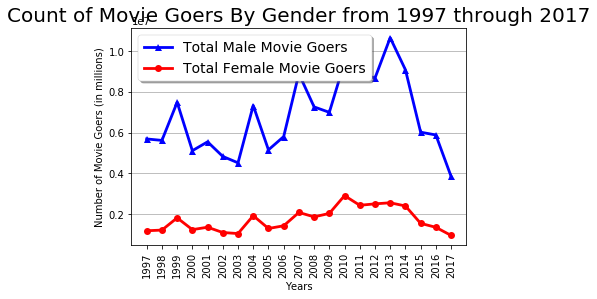

In [15]:
# Collect the years where data was collected
USA_movies_by_year.reset_index(inplace = True)

# Create labels for the X and Y axis
plt.title("Count of Movie Goers By Gender from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Number of Movie Goers (in millions)", fontsize=10)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the chart and apply some styling
male_viewers, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_allages_votes'],
                         color='b', marker="^", markersize=7, label="Total Male Movie Goers")

female_viewers, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_allages_votes'],
                           color='r',  marker="o", markersize=7, label="Total Female Movie Goers")

plt.legend(handles=[male_viewers, female_viewers], fontsize=14, fancybox=True, shadow=True)

In [16]:
# The graph shows movie attendance by gender. 
# The disparity between the sexes show male movie goers are more inclined to include the movies as an entertainment option.

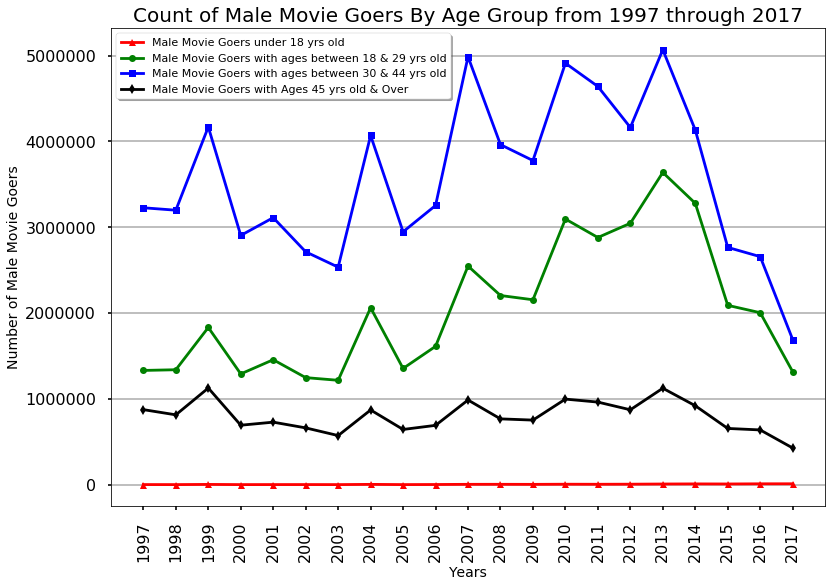

In [17]:
# Create Graph of Male Movie Goers by Age Group

# Create labels for the X and Y axis
plt.title("Count of Male Movie Goers By Age Group from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Male Movie Goers", fontsize=14)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the chart and apply some styling
male_viewers_under18, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_0age_votes'],
                         color='r', marker="^", markersize=7, label="Male Movie Goers under 18 yrs old")

male_viewers_18_30, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_18age_votes'],
                           color='g',  marker="o", markersize=7,
                               label="Male Movie Goers with ages between 18 & 29 yrs old")

male_viewers_30_45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_30age_votes'],
                         color='b', marker="s", markersize=7,
                               label="Male Movie Goers with ages between 30 & 44 yrs old")

male_viewers_over45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['males_45age_votes'],
                           color='k',  marker="d", markersize=7,
                               label="Male Movie Goers with Ages 45 yrs old & Over")

plt.legend(handles=[male_viewers_under18, male_viewers_18_30, male_viewers_30_45, male_viewers_over45],
           fontsize=11, fancybox=True, shadow=True)

In [18]:
# The graph shows male movie viewer attendance by age-group. 
# Male movie goers between the ages of 30 to 44 years of age
#     have consistently outpaced all other age-groups in terms of attendance.

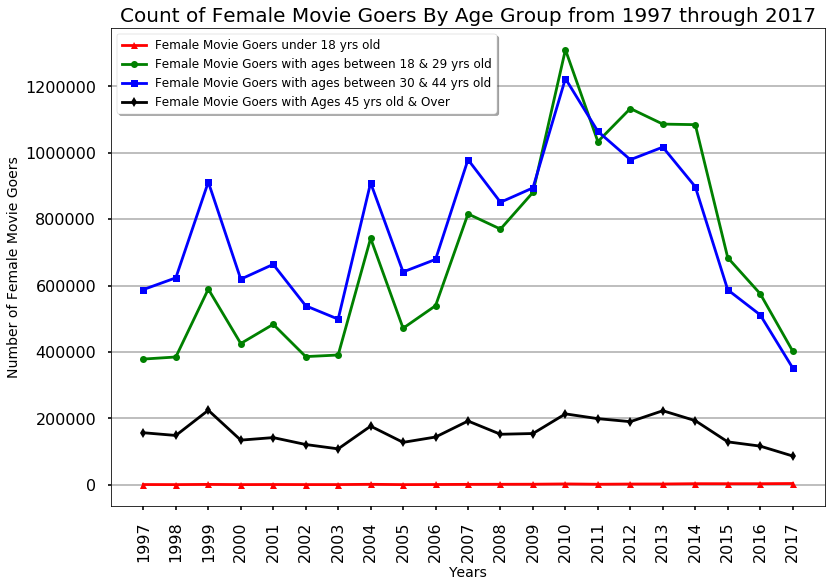

In [19]:
# Create Graph of Male Movie Goers by Age Group

# Create labels for the X and Y axis
plt.title("Count of Female Movie Goers By Age Group from 1997 through 2017", fontsize=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Female Movie Goers", fontsize=14)
plt.xticks(range(1997,2018), rotation='vertical')

plt.style.use("seaborn-poster")
plt.grid(axis="y")

# Plot the charts and apply some styling
female_viewers_under18, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_0age_votes'],
                         color='r', marker="^", markersize=7, label="Female Movie Goers under 18 yrs old")

female_viewers_18_30, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_18age_votes'],
                           color='g',  marker="o", markersize=7,
                               label="Female Movie Goers with ages between 18 & 29 yrs old")

female_viewers_30_45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_30age_votes'],
                         color='b', marker="s", markersize=7,
                               label="Female Movie Goers with ages between 30 & 44 yrs old")

female_viewers_over45, = plt.plot(USA_movies_by_year['year'], USA_movies_by_year['females_45age_votes'],
                           color='k',  marker="d", markersize=7,
                               label="Female Movie Goers with Ages 45 yrs old & Over")

plt.legend(handles=[female_viewers_under18, female_viewers_18_30, female_viewers_30_45, female_viewers_over45],
           fontsize=12, fancybox=True, shadow=True)

In [20]:
# The graph shows female movie viewer attendance by age-group. 
# Female movie goers between the ages of 30 to 44 years of age show high attendance in the first half of the study timeframe.
# The younger group of female movie goers between the ages of  18 to 29 years of age, pick up interest from 2009 going forward.
# A review of movies and movie genre produced within this time frame might hold clues on the resurgent interest by this age-group.